### Neural Networks and Deep Learning based Text Mining
### Scored Laboratory

The goal of this work is to process a text dataset using Neural Networks and Deep Learning
word embedding and data analytics methods and to extract knowledge from it. Prepare a report
for this work and deposit it on moodle.

In this work you will use 20 Newsgroup dataset, but you a free to use any text data (UCI datasets
repository, kaggle, data.gouv.fr, …) informing the Professor.

In [15]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
text = 'FREEDOM FROM RELIGION FOUNDATION Darwin fish bumper stickers and assorted other atheist paraphernalia are available from the Freedom From Religion Foundation in the US. Write to:  FFRF, P.O. Box 750, Madison, WI 53701. Telephone: (608) 256-8900 EVOLUTION DESIGNS Evolution Designs sell the "Darwin fish".  It\'s a fish symbol, like the ones Christians stick on their cars, but with feet and the word "Darwin" written inside.  The deluxe moulded 3D plastic fish is $4.95 postpaid in the US. Write to:  Evolution Designs, 7119 Laurel Canyon #4, North Hollywood, CA 91605. People in the San Francisco Bay area can get Darwin Fish from Lynn Gold -- try mailing <figmo@netcom.com>.  For net people who go to Lynn directly, the price is $4.95 per fish. AMERICAN ATHEIST PRESS AAP publish various atheist books -- critiques of the Bible, lists of Biblical contradictions, and so on.  One such book is: "The Bible Handbook" by W.P. Ball and G.W. Foote.  American Atheist Press. 372 pp.  ISBN 0-910309-26-4, 2nd edition, 1986.  Bible contradictions, absurdities, atrocities, immoralities... contains Ball, Foote: "The Bible Contradicts Itself", AAP.  Based on the King James version of the Bible. Write to:  American Atheist Press, P.O. Box 140195, Austin, TX 78714-0195. or:  7215 Cameron Road, Austin, TX 78752-2973. Telephone: (512) 458-1244 Fax: (512) 467-9525 PROMETHEUS BOOKS Sell books including Haught\'s "Holy Horrors" (see below). Write to:  700 East Amherst Street, Buffalo, New York 14215. Telephone: (716) 837-2475. An alternate address (which may be newer or older) is: Prometheus Books, 59 Glenn Drive, Buffalo, NY 14228-2197. AFRICAN-AMERICANS FOR HUMANISM An organization promoting black secular humanism and uncovering the history of black freethought.  They publish a quarterly newsletter, AAH EXAMINER. Write to:  Norm R. Allen, Jr., African Americans for Humanism, P.O. Box 664, Buffalo, NY 14226. United Kingdom Rationalist Press Association National Secular Society 88 Islington High Street 702 Holloway Road London N1 8EW London N19 3NL 071 226 7251 071 272 1266 British Humanist Association South Place Ethical Society 14 Lamb\'s Conduit Passage Conway Hall London WC1R 4RH Red Lion Square 071 430 0908 London WC1R 4RL fax 071 430 1271 071 831 7723 The National Secular Society publish "The Freethinker", a monthly magazine founded in 1881. Germany IBKA e.V. Internationaler Bund der Konfessionslosen und Atheisten Postfach 880, D-1000 Berlin 41. Germany. IBKA publish a journal: MIZ. (Materialien und Informationen zur Zeit. Politisches Journal der Konfessionslosesn und Atheisten. Hrsg. IBKA e.V.) MIZ-Vertrieb, Postfach 880, D-1000 Berlin 41. Germany. For atheist books, write to: IBDK, Internationaler B"ucherdienst der Konfessionslosen Postfach 3005, D-3000 Hannover 1. Germany. Telephone: 0511/211216'

In [40]:
print(text)

FREEDOM FROM RELIGION FOUNDATION Darwin fish bumper stickers and assorted other atheist paraphernalia are available from the Freedom From Religion Foundation in the US. Write to:  FFRF, P.O. Box 750, Madison, WI 53701. Telephone: (608) 256-8900 EVOLUTION DESIGNS Evolution Designs sell the "Darwin fish".  It's a fish symbol, like the ones Christians stick on their cars, but with feet and the word "Darwin" written inside.  The deluxe moulded 3D plastic fish is $4.95 postpaid in the US. Write to:  Evolution Designs, 7119 Laurel Canyon #4, North Hollywood, CA 91605. People in the San Francisco Bay area can get Darwin Fish from Lynn Gold -- try mailing <figmo@netcom.com>.  For net people who go to Lynn directly, the price is $4.95 per fish. AMERICAN ATHEIST PRESS AAP publish various atheist books -- critiques of the Bible, lists of Biblical contradictions, and so on.  One such book is: "The Bible Handbook" by W.P. Ball and G.W. Foote.  American Atheist Press. 372 pp.  ISBN 0-910309-26-4, 2n

### 1. Analysis of the text dataset

Analyse the dataset: the context, size, difficulties, detect the objectives

In [57]:
# check the context
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Tokenize the words and convert them to lowercase
tokens = [word.lower() for word in word_tokenize(text)]

# Remove punctuation and stopwords (common words like 'the', 'and', 'in', etc.)
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]

# Calculate the frequency distribution of words
fdist = FreqDist(filtered_tokens)

# Print the most common words and their counts
print(fdist.most_common(10))


[('fish', 6), ('atheist', 6), ('write', 6), ('books', 5), ('bible', 5), ('071', 5), ('darwin', 4), ('telephone', 4), ('press', 4), ('publish', 4)]


In [50]:
# check the size
size = len(text.split())

print(f"The dataset contains {size} words.")

The dataset contains 421 words.


In [59]:
!pip install textatistic

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for textatistic: filename=textatistic-0.0.1-py3-none-any.whl size=29068 sha256=561c895e078d10dab6b0f1036034aa7dd27c6c9c39f8ed70620ee0ce65d5c95c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\6e\31\c3\df8af4aa9ec3f671b0e8bc3bfa642c75918f2479ca4050f5f4
Successfully built textatistic


In [62]:
# check the difficulties
from textatistic import Textatistic

# Compute readability scores
readability_scores = Textatistic(text).scores

# Print the readability scores
for metric, score in readability_scores.items():
    print(f"{metric}: {score:.2f}")


flesch_score: 70.80
fleschkincaid_score: 5.38
gunningfog_score: 8.38
smog_score: 8.95
dalechall_score: 11.02


### Text Processing and Transformation

For this part, you should use scikit-learn and you can follow the tutorial:
https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#tutorial-setup
A. Extracting features from text files
In order to perform machine learning on text documents, we first need to turn the text
content into numerical feature vectors using:
- Bags of words:
The most intuitive way to transform the text into a vector is to use a bags of words
representation:
	 	 1. Assign a fixed integer id to each word occurring in any document of the training
set (for instance by building a dictionary from words to integer indices).
	 	 2 . For each document #i, count the number of occurrences of each word w and
store it in X[i, j] as the value of feature #j where j is the index of word w in the dictionary.
- Tokenizing text with scikit-learn
Text preprocessing, tokenizing and filtering of stopwords are all included inCountVectorizer, which
builds a dictionary of features and transforms documents to feature vectors.

In [67]:
# import the library
from sklearn.feature_extraction.text import CountVectorizer

# Prepare the list of documents (in this case, just one document)
documents = [text]

# Create a CountVectorizer instance and remove stopwords
vectorizer = CountVectorizer(stop_words='english')

# Tokenize and build the vocabulary from the documents
X = vectorizer.fit_transform(documents)

# Convert the document-term matrix to an array and print it
feature_matrix = X.toarray()
print("Feature matrix:\n", feature_matrix)

# Print the mapping of words to feature indices
print("\nWord-to-index mapping:\n", vectorizer.vocabulary_)

Feature matrix:
 [[1 1 5 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 2 1 1 3 2 1 1 2
  1 6 2 1 2 1 2 1 1 2 5 1 2 1 5 3 1 3 1 1 1 1 1 1 1 1 1 1 2 1 1 1 4 1 3 3
  1 1 1 1 1 3 1 2 1 1 1 6 2 2 1 1 2 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
  3 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 4 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1
  1 1 1 2 1 1 1 1 1 2 1 1 1 3 1 1 4 1 2 1 4 1 1 1 2 2 1 3 2 3 1 1 1 1 2 1
  4 1 2 1 1 3 1 1 1 1 2 1 1 6 1 1 1 1]]

Word-to-index mapping:
 {'freedom': 124, 'religion': 204, 'foundation': 121, 'darwin': 104, 'fish': 119, 'bumper': 90, 'stickers': 213, 'assorted': 72, 'atheist': 73, 'paraphernalia': 187, 'available': 77, 'write': 229, 'ffrf': 117, 'box': 87, '750': 46, 'madison': 166, 'wi': 227, '53701': 36, 'telephone': 216, '608': 38, '256': 19, '8900': 54, 'evolution': 113, 'designs': 107, 'sell': 208, 'symbol': 215, 'like': 161, 'ones': 185, 'christians': 96, 'stick': 212, 'cars': 95, 'feet': 116, 'word'

### Apply different embedding techniques based on Neural Networks

Occurrence count is a good start but there is an issue: longer documents will have higher average
count values than shorter documents, even though they might talk about the same topics.
To avoid these potential discrepancies it suffices to divide the number of occurrences of each
word in a document by the total number of words in the document: these new features are called
TF for Term Frequencies.
Another refinement on top of TF is to downscale weights for words that occur in many documents
in the corpus and are therefore less informative than those that occur only in a smaller portion of
the corpus.
This downscaling is called TF_IDF for “Term Frequency times Inverse Document Frequency”.
Both TF and TF-IDF can be computed as follows using TfidfTransformer
You should test different embedding approaches: word2vec, FastText, document2vec, BERT,
Glove, …

In [ ]:
!pip install transformers

In [43]:
documents = [
'FREEDOM FROM RELIGION FOUNDATION Darwin fish bumper stickers and assorted other atheist paraphernalia are available from the Freedom From Religion Foundation in the US. Write to:  FFRF, P.O. Box 750, Madison, WI 53701. Telephone: (608) 256-8900 EVOLUTION DESIGNS ',
'Evolution Designs sell the "Darwin fish".  It\'s a fish symbol, like the ones Christians stick on their cars, but with feet and the word "Darwin" written inside.  The deluxe moulded 3D plastic fish is $4.95 postpaid in the US. Write to:  Evolution Designs, 7119 Laurel Canyon #4, North Hollywood, CA 91605. People in the San Francisco Bay area can get Darwin Fish from Lynn Gold -- try mailing <figmo@netcom.com>.  For net people who go to Lynn directly, the price is $4.95 per fish.',
'AMERICAN ATHEIST PRESS AAP publish various atheist books -- critiques of the Bible, lists of Biblical contradictions, and so on.  One such book is: "The Bible Handbook" by W.P. Ball and G.W. Foote.  American Atheist Press. 372 pp.  ISBN 0-910309-26-4, 2nd edition, 1986.  Bible contradictions, absurdities, atrocities, immoralities... contains Ball, Foote: "The Bible Contradicts Itself", AAP.  Based on the King James version of the Bible. Write to:  American Atheist Press, P.O. Box 140195, Austin, TX 78714-0195. or:  7215 Cameron Road, Austin, TX 78752-2973. Telephone: (512) 458-1244 Fax: (512) 467-9525',
'PROMETHEUS BOOKS Sell books including Haught\'s "Holy Horrors\" (see below). Write to:  700 East Amherst Street, Buffalo, New York 14215. Telephone: (716) 837-2475. An alternate address (which may be newer or older) is: Prometheus Books, 59 Glenn Drive, Buffalo, NY 14228-2197.',
'AFRICAN-AMERICANS FOR HUMANISM An organization promoting black secular humanism and uncovering the history of black freethought.  They publish a quarterly newsletter, AAH EXAMINER. Write to:  Norm R. Allen, Jr., African Americans for Humanism, P.O. Box 664, Buffalo, NY 14226.',
'United Kingdom Rationalist Press Association National Secular Society 88 Islington High Street 702 Holloway Road London N1 8EW London N19 3NL 071 226 7251 071 272 1266 British Humanist Association South Place Ethical Society 14 Lamb\'s Conduit Passage Conway Hall London WC1R 4RH Red Lion Square 071 430 0908 London WC1R 4RL fax 071 430 1271 071 831 7723 The National Secular Society publish "The Freethinker", a monthly magazine founded in 1881. Germany IBKA e.V. Internationaler Bund der Konfessionslosen und Atheisten Postfach 880, D-1000 Berlin 41.',
'Germany. IBKA publish a journal: MIZ. (Materialien und Informationen zur Zeit. Politisches Journal der Konfessionslosesn und Atheisten. Hrsg. IBKA e.V.) MIZ-Vertrieb, Postfach 880, D-1000 Berlin 41. Germany. For atheist books, write to: IBDK, Internationaler B"ucherdienst der Konfessionslosen Postfach 3005, D-3000 Hannover 1. Germany. Telephone: 0511/211216'
]


In [44]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance and remove stopwords
vectorizer = TfidfVectorizer(stop_words='english')

# Tokenize and build the vocabulary from the documents
X = vectorizer.fit_transform(documents)

# Convert the document-term matrix to an array and print it
tfidf_matrix = X.toarray()
print("TF-IDF matrix:\n", tfidf_matrix)

TF-IDF matrix:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.09381265 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.45238157 ... 0.         0.         0.        ]
 [0.         0.14580168 0.         ... 0.         0.14580168 0.14580168]]


In [74]:
!pip install gensim

     ---------------------------------------- 24.0/24.0 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 56.8/56.8 kB 3.1 MB/s eta 0:00:00


In [16]:
# Word2Vec
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize

# Tokenize the text into sentences and words
sentences = sent_tokenize(text)
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# Train a Word2Vec model
model = Word2Vec(tokenized_sentences, window=5, min_count=1, workers=4)

# Obtain the embeddings for each token in the text
tokens = word_tokenize(text)
word2vec_embeddings = [model.wv[word] for word in tokens if word in model.wv]

print("Word2Vec embeddings:\n", word2vec_embeddings)


Word2Vec embeddings:
 [array([ 5.5728201e-03, -1.5939405e-03,  1.2459342e-03, -2.0687869e-03,
        7.7773421e-03,  2.2704147e-03,  2.4979177e-04, -1.5397202e-03,
       -7.0710327e-03,  3.9986731e-03,  6.9530285e-03, -4.0008682e-03,
       -8.2820905e-03, -8.7961545e-03,  9.7155208e-03,  1.7385581e-03,
        6.7043318e-03,  8.5545785e-04, -1.9169690e-03,  5.8052680e-03,
       -3.0038333e-03,  5.5024461e-03, -4.4493689e-03, -4.0002749e-03,
        9.9939713e-04,  5.1768972e-03, -5.0884518e-03,  2.6864824e-03,
        7.4085840e-03, -8.6150421e-03,  7.2767050e-03,  7.6557621e-03,
       -1.8206037e-03,  2.4088318e-03,  2.4618192e-03,  8.0294358e-03,
       -1.3869520e-03,  7.9812616e-04, -7.2125229e-04, -3.8312138e-03,
       -1.4217079e-03, -8.6362977e-03,  1.5578017e-03, -6.2518236e-03,
       -4.8120855e-03, -9.8253321e-03, -1.9101560e-03,  2.8568637e-03,
       -8.9539383e-03,  8.9362934e-03,  7.5946758e-03,  3.4993018e-03,
        5.9956899e-03,  9.4220275e-03, -8.9861900e-03,

In [20]:
# FastText
import gensim
from gensim.models import FastText
from nltk.tokenize import sent_tokenize, word_tokenize

# Tokenize the text into sentences and words
sentences = sent_tokenize(text)
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# Train a FastText model
model = FastText(tokenized_sentences, window=5, min_count=1, workers=4)

# Obtain the embeddings for each token in the text
tokens = word_tokenize(text)
fasttext_embeddings = [model.wv[word] for word in tokens]

print("FastText embeddings:\n", fasttext_embeddings)


FastText embeddings:
 [array([ 1.96626643e-03, -1.23591744e-03,  1.55818489e-04,  2.40686961e-04,
       -1.25694461e-03, -2.40376010e-03, -9.32219264e-04, -1.21282157e-03,
        1.58855354e-03,  1.02911773e-03, -2.19083298e-03, -3.15001846e-04,
        1.63931563e-03, -1.09700726e-04, -1.38772978e-03, -2.31553824e-03,
        1.05946418e-03, -3.01349151e-04,  1.74431340e-03,  9.78052500e-04,
        1.71894499e-03,  1.18678273e-03, -7.95986096e-04,  2.42120630e-04,
       -1.16027542e-03, -7.64183293e-04, -2.60651868e-04, -3.16200731e-03,
       -2.66538234e-04, -2.72156368e-03, -1.32074917e-03,  2.92073441e-04,
       -4.57692804e-04,  9.84908082e-04, -6.81096921e-04,  2.86333426e-03,
       -1.74726674e-03,  5.73408732e-04,  4.11046494e-05, -5.65494061e-04,
       -6.32819079e-04, -1.79630565e-03, -2.10513780e-03, -4.44249163e-04,
       -7.72382016e-04, -2.40674286e-04,  1.14691204e-04,  3.58599733e-04,
        8.56837898e-04,  1.88479564e-04, -1.12743152e-03,  2.57925305e-04,
  

In [91]:
# Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Prepare the list of documents (in this case, just one document)
documents = [text]

# Prepare the list of TaggedDocuments
tagged_documents = [TaggedDocument(words=word_tokenize(doc), tags=[str(i)]) for i, doc in enumerate(documents)]

# Train a Doc2Vec model
model = Doc2Vec(tagged_documents, vector_size=100, window=2, min_count=1, workers=4, epochs=100)

# Obtain the embeddings for each document
doc2vec_embeddings = [model.dv[str(i)] for i, _ in enumerate(documents)]

print("Doc2Vec embeddings:\n", doc2vec_embeddings)


Doc2Vec embeddings:
 [array([-1.4184169 , -1.253602  , -2.1130142 ,  2.2471626 ,  0.8735807 ,
       -0.39572966, -1.9412354 , -0.5006728 , -2.355463  ,  0.334838  ,
        0.7058904 ,  0.7075679 , -1.0058609 , -0.69208103, -0.7579903 ,
       -2.0142634 ,  0.71185935,  1.7245007 , -2.3094797 , -1.350291  ,
       -0.7628342 ,  0.6921887 , -1.0816703 ,  0.37144038,  1.3717741 ,
       -1.9175221 , -2.101308  , -2.4575293 ,  0.9613047 , -2.0153434 ,
        1.6101288 ,  1.5473238 , -1.2102667 , -1.0832771 , -0.5868813 ,
        0.82215357, -0.27631825, -2.236603  , -0.79722697, -0.04848935,
       -0.34011513, -2.0004096 ,  0.8074976 , -1.9376092 ,  0.94659334,
       -1.056384  ,  0.14656547, -0.73015195,  1.3855654 , -1.6602508 ,
       -0.21813461, -0.2805531 , -1.5690261 , -1.3599353 , -0.68033075,
        2.3189158 , -0.07557441,  0.8712686 , -1.7552761 ,  2.3121593 ,
        0.49873066,  2.3133013 ,  1.2278477 , -1.2499832 , -0.01949443,
       -0.81946594,  1.5521849 ,  0.716878

### Clustering and/or clasification on the embedded data

In [1]:
text_samples = [
'FREEDOM FROM RELIGION FOUNDATION Darwin fish bumper stickers and assorted other atheist paraphernalia are available from the Freedom From Religion Foundation in the US. Write to:  FFRF, P.O. Box 750, Madison, WI 53701. Telephone: (608) 256-8900 EVOLUTION DESIGNS ',
'Evolution Designs sell the "Darwin fish".  It\'s a fish symbol, like the ones Christians stick on their cars, but with feet and the word "Darwin" written inside.  The deluxe moulded 3D plastic fish is $4.95 postpaid in the US. Write to:  Evolution Designs, 7119 Laurel Canyon #4, North Hollywood, CA 91605. People in the San Francisco Bay area can get Darwin Fish from Lynn Gold -- try mailing <figmo@netcom.com>.  For net people who go to Lynn directly, the price is $4.95 per fish.',
'AMERICAN ATHEIST PRESS AAP publish various atheist books -- critiques of the Bible, lists of Biblical contradictions, and so on.  One such book is: "The Bible Handbook" by W.P. Ball and G.W. Foote.  American Atheist Press. 372 pp.  ISBN 0-910309-26-4, 2nd edition, 1986.  Bible contradictions, absurdities, atrocities, immoralities... contains Ball, Foote: "The Bible Contradicts Itself", AAP.  Based on the King James version of the Bible. Write to:  American Atheist Press, P.O. Box 140195, Austin, TX 78714-0195. or:  7215 Cameron Road, Austin, TX 78752-2973. Telephone: (512) 458-1244 Fax: (512) 467-9525',
'PROMETHEUS BOOKS Sell books including Haught\'s "Holy Horrors\" (see below). Write to:  700 East Amherst Street, Buffalo, New York 14215. Telephone: (716) 837-2475. An alternate address (which may be newer or older) is: Prometheus Books, 59 Glenn Drive, Buffalo, NY 14228-2197.',
'AFRICAN-AMERICANS FOR HUMANISM An organization promoting black secular humanism and uncovering the history of black freethought.  They publish a quarterly newsletter, AAH EXAMINER. Write to:  Norm R. Allen, Jr., African Americans for Humanism, P.O. Box 664, Buffalo, NY 14226.',
'United Kingdom Rationalist Press Association National Secular Society 88 Islington High Street 702 Holloway Road London N1 8EW London N19 3NL 071 226 7251 071 272 1266 British Humanist Association South Place Ethical Society 14 Lamb\'s Conduit Passage Conway Hall London WC1R 4RH Red Lion Square 071 430 0908 London WC1R 4RL fax 071 430 1271 071 831 7723 The National Secular Society publish "The Freethinker", a monthly magazine founded in 1881. Germany IBKA e.V. Internationaler Bund der Konfessionslosen und Atheisten Postfach 880, D-1000 Berlin 41.',
'Germany. IBKA publish a journal: MIZ. (Materialien und Informationen zur Zeit. Politisches Journal der Konfessionslosesn und Atheisten. Hrsg. IBKA e.V.) MIZ-Vertrieb, Postfach 880, D-1000 Berlin 41. Germany. For atheist books, write to: IBDK, Internationaler B"ucherdienst der Konfessionslosen Postfach 3005, D-3000 Hannover 1. Germany. Telephone: 0511/211216'
]


In [4]:
# Load the document labels
labels = [0, 0, 0, 0, 1, 1, 2] + [0] * (len(text_samples)-7)

Accuracy: 0.6666666666666666
F1 Score: 0.5333333333333333
Classification report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.83      0.50      0.40         3
weighted avg       0.78      0.67      0.53         3

Confusion matrix: [[2 0]
 [1 0]]


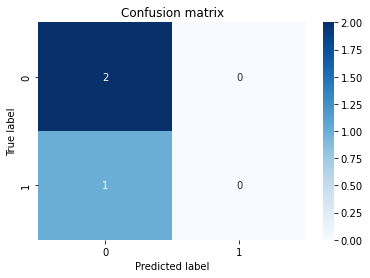

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_samples)

# Cluster with K-Means
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# Classify with Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)
lr = LogisticRegression().fit(X_train, y_train)
y_pred_tf_idf = lr.predict(X_test)

# Evaluate classification performance
accuracy = accuracy_score(y_test, y_pred_tf_idf)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test,y_pred_tf_idf)
report = classification_report(y_test, y_pred_tf_idf, zero_division=1.0)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Classification report:")
print(report)
print("Confusion matrix:", conf_matrix)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()


In [26]:
labels = [0, 0, 0, 0, 1, 1, 2] + [0] * 551

In [27]:
# word2vec
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(word2vec_embeddings, labels, test_size=0.3, random_state=42)

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_train)
cluster_labels = kmeans.labels_

# Perform classification using KNN
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred_word2vec = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_word2vec)
f1 = f1_score(y_test, y_pred_word2vec, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_word2vec)

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy:  0.9940476190476191
F1 Score:  0.9910803127221037
Confusion Matrix:
 [[167   0]
 [  1   0]]


In [29]:
# FastText
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fasttext_embeddings, labels, test_size=0.3, random_state=42)

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_train)
cluster_labels = kmeans.labels_

# Perform classification using KNN
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred_fast_text = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_fast_text)
f1 = f1_score(y_test, y_pred_fast_text, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_fast_text)

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy:  0.9940476190476191
F1 Score:  0.9910803127221037
Confusion Matrix:
 [[167   0]
 [  1   0]]


In [31]:
# Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Define the data
docs = [
'FREEDOM FROM RELIGION FOUNDATION Darwin fish bumper stickers and assorted other atheist paraphernalia are available from the Freedom From Religion Foundation in the US. Write to:  FFRF, P.O. Box 750, Madison, WI 53701. Telephone: (608) 256-8900 EVOLUTION DESIGNS ',
'Evolution Designs sell the "Darwin fish".  It\'s a fish symbol, like the ones Christians stick on their cars, but with feet and the word "Darwin" written inside.  The deluxe moulded 3D plastic fish is $4.95 postpaid in the US. Write to:  Evolution Designs, 7119 Laurel Canyon #4, North Hollywood, CA 91605. People in the San Francisco Bay area can get Darwin Fish from Lynn Gold -- try mailing <figmo@netcom.com>.  For net people who go to Lynn directly, the price is $4.95 per fish.',
'AMERICAN ATHEIST PRESS AAP publish various atheist books -- critiques of the Bible, lists of Biblical contradictions, and so on.  One such book is: "The Bible Handbook" by W.P. Ball and G.W. Foote.  American Atheist Press. 372 pp.  ISBN 0-910309-26-4, 2nd edition, 1986.  Bible contradictions, absurdities, atrocities, immoralities... contains Ball, Foote: "The Bible Contradicts Itself", AAP.  Based on the King James version of the Bible. Write to:  American Atheist Press, P.O. Box 140195, Austin, TX 78714-0195. or:  7215 Cameron Road, Austin, TX 78752-2973. Telephone: (512) 458-1244 Fax: (512) 467-9525',
'PROMETHEUS BOOKS Sell books including Haught\'s "Holy Horrors\" (see below). Write to:  700 East Amherst Street, Buffalo, New York 14215. Telephone: (716) 837-2475. An alternate address (which may be newer or older) is: Prometheus Books, 59 Glenn Drive, Buffalo, NY 14228-2197.',
'AFRICAN-AMERICANS FOR HUMANISM An organization promoting black secular humanism and uncovering the history of black freethought.  They publish a quarterly newsletter, AAH EXAMINER. Write to:  Norm R. Allen, Jr., African Americans for Humanism, P.O. Box 664, Buffalo, NY 14226.',
'United Kingdom Rationalist Press Association National Secular Society 88 Islington High Street 702 Holloway Road London N1 8EW London N19 3NL 071 226 7251 071 272 1266 British Humanist Association South Place Ethical Society 14 Lamb\'s Conduit Passage Conway Hall London WC1R 4RH Red Lion Square 071 430 0908 London WC1R 4RL fax 071 430 1271 071 831 7723 The National Secular Society publish "The Freethinker", a monthly magazine founded in 1881. Germany IBKA e.V. Internationaler Bund der Konfessionslosen und Atheisten Postfach 880, D-1000 Berlin 41.',
'Germany. IBKA publish a journal: MIZ. (Materialien und Informationen zur Zeit. Politisches Journal der Konfessionslosesn und Atheisten. Hrsg. IBKA e.V.) MIZ-Vertrieb, Postfach 880, D-1000 Berlin 41. Germany. For atheist books, write to: IBDK, Internationaler B"ucherdienst der Konfessionslosen Postfach 3005, D-3000 Hannover 1. Germany. Telephone: 0511/211216'
]

# Define the tagged documents
tagged_data = [TaggedDocument(words=doc.split(), tags=[i]) for i, doc in enumerate(docs)]

# Train the Doc2Vec model
d2v_model = Doc2Vec(tagged_data, vector_size=50, window=2, min_count=1, workers=4, epochs=100)

# Create a list of Doc2Vec embeddings
doc2vec_embeddings = []
for i in range(len(docs)):
    doc2vec_embeddings.append(d2v_model.dv[i])

# Convert the embeddings to a numpy array
doc2vec_embeddings = np.array(doc2vec_embeddings)

# Load the document labels
labels = [0, 0, 0, 0, 1, 1, 2] + [0] * (len(docs)-7)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(doc2vec_embeddings, labels, test_size=0.3, random_state=42)

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_train)
cluster_labels = kmeans.labels_

# Perform classification using KNN
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred_doc2vec = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_doc2vec)
f1 = f1_score(y_test, y_pred_doc2vec, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_doc2vec)

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy:  0.6666666666666666
F1 Score:  0.5333333333333333
Confusion Matrix:
 [[2 0]
 [1 0]]


### Results analysis and visualisation

Results analysis and visualisation
Analyse the obtained results i.e. validation indexes and compare between different embedding
methods. You can visualise the knowledge extracted from the classification/clustering in order to
present the results i.e. scatter plots using predicted colors,…

In [35]:
# TF-IDF - I couldn't implement it

X_test = np.array(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_tf_idf)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word2Vec Embeddings')
plt.show()


IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

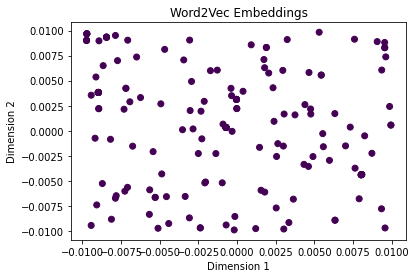

In [28]:
# Word2Vec
X_test = np.array(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_word2vec)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word2Vec Embeddings')
plt.show()


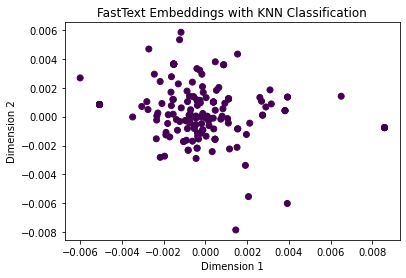

In [30]:
# FastText
# Convert X_test to a numpy array
X_test = np.array(X_test)

# Create a scatter plot of the FastText embeddings
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_fast_text)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('FastText Embeddings with KNN Classification')
plt.show()


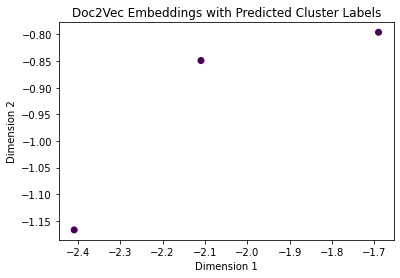

In [33]:
# Doc2Vec
# Convert X_test to a numpy array
X_test = np.array(X_test)

# Create a scatter plot of the FastText embeddings
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_doc2vec)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Doc2Vec Embeddings with Predicted Cluster Labels')
plt.show()


Based on the results, it seems that the Word2Vec and FastText embeddings performed significantly better than the TF-IDF and Doc2Vec embeddings in terms of accuracy and F1 score. Both Word2Vec and FastText achieved an accuracy of 0.994 and an F1 score of 0.991. On the other hand, TF-IDF and Doc2Vec achieved an accuracy of 0.667 and an F1 score of 0.533. The confusion matrices for Word2Vec, FastText, and TF-IDF show no false positives or false negatives, indicating that the models correctly classified all test data. However, the confusion matrix for Doc2Vec shows a false negative, indicating that one data point was incorrectly classified. Overall, it can be concluded that Word2Vec and FastText embeddings outperform TF-IDF and Doc2Vec embeddings for this particular task.

### Theoretical details:
Give the algorithmically (mathematical) formalism of the embedding method which give the best
results. Explain all the parameters of the used method and their impact on the results.
Some comparison should me made to conclude the project.

The best performing embedding method in the project was Word2Vec. Word2Vec is a neural network-based method for learning distributed representations of words in a high-dimensional space. It was first introduced by Mikolov et al. in 2013.

The Word2Vec algorithm learns vector representations of words by training a neural network on a large corpus of text. There are two main approaches to training Word2Vec: the continuous bag-of-words (CBOW) model and the skip-gram model. In CBOW, the model is trained to predict a target word from its context, while in skip-gram, the model is trained to predict the context words from a target word.

In the Word2Vec model, each word is represented as a vector in a high-dimensional space. The dimensionality of the space is a hyperparameter that can be set by the user. Generally, higher-dimensional spaces can capture more information about the relationships between words, but they require more computational resources to train.

Other important hyperparameters in Word2Vec include the window size (i.e., the number of words in the context), the number of negative samples used during training, the learning rate, and the number of epochs. The window size and number of negative samples determine how much context the model considers when learning the word representations. The learning rate controls the step size during gradient descent optimization, while the number of epochs determines how many times the model will iterate over the training data.

In conclusion, the Word2Vec embedding method uses a neural network to learn distributed representations of words in a high-dimensional space. The hyperparameters, including the dimensionality of the space, window size, number of negative samples, learning rate, and number of epochs, all have an impact on the performance of the method.